# Notebook for Research on Last Iterate of SGD Step Size Regimes

This notebook will go over the work of Jain et al, 2019 - included in the sources at the bottom of the notebook.

In [1]:
import cvxpy as cp
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from matplotlib.animation import FuncAnimation

from IPython.core.display import Image, display
from mpl_toolkits.mplot3d import Axes3D

# Set plotting font sizes and properties
TINY_SIZE = 12
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
MARKER_SIZE = 6
LINE_SIZE = 4

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=TINY_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("lines", markersize=MARKER_SIZE)  # marker size
plt.rc("lines", linewidth=LINE_SIZE)  # line width
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

mpl.rcParams["figure.dpi"] = 180 # sets the image quality

# Height and width per row and column of subplots
FIG_HEIGHT = 18
FIG_WIDTH = 16
fig_fcn = lambda kwargs: plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), **kwargs)
color_list = sns.color_palette("Paired")

# Demystifying the Step Size Regime

Assuming we know $T$, the number of iterations to reach $\epsilon$-accuracy in advance, then Jain et al considers the following step size regime. 

First define 

$$k=\inf\left\{i: \frac{T}{2^i}\leq 1\right\}$$

and 

$$T_i=T - \left\lceil \frac{T}{2^i}\right\rceil$$

for $i\in[k]$ and denote $T_{k+1}=T$. From here, consider some arbitrary constant $C>0$. Then the step size considered here is given by for $t\in[T]$,

$$\alpha_t = \frac{C}{\sqrt{t}}\cdot\frac{1}{2^i}$$

for $t\geq T_i$ and $t\leq T_{i+1}$. This sequence generates a decaying step size ranging from $\frac{C}{\sqrt{T}}$ initially to $\frac{C}{T}$ at the penultimate regime. Let us visualize this regime below setting $C=1$ and $T=1000$.

In [2]:
def jain_stepsize(T, C):
    """Returns the step-size sequence described in Jain et al 2019
    for the final iterate of SGD
    :param: T - natural number, denotes the number of iterations for epsilon-accuracy in SGD
    :param: C - positive float, denotes an arbitrary tuning param
    :return array of step-sizes at each time i between 1 and T
    """
    k = 1
    while T > 2**k:
        k += 1
    T_set = [T - np.ceil(T / 2**i) for i in range(k+1)]
    alphas = []
    for t in range(1, T+1):
        # this grabs where in T_i that t is <= T_i+1 and >= T_i
        i = np.searchsorted(T_set, t) - 1
        alpha_t = C / (np.sqrt(T) * 2**i)
        alphas.append(alpha_t)
        
    return T_set, alphas

In [3]:
T_set, step_sizes = jain_stepsize(1000, 1)

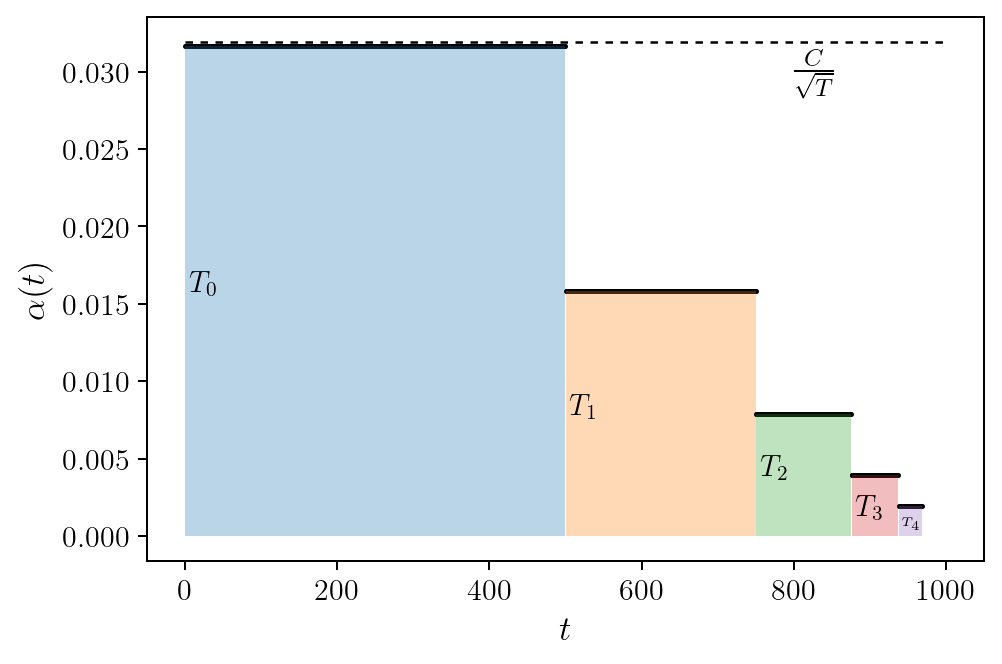

In [12]:
x = np.linspace(0, 1000, 1000)
#plt.scatter(x, step_sizes, color='purple', s=1)
plt.plot(x, (1.009 / np.sqrt(1000)) * np.ones(1000), color='black', ls='--', dashes=(3, 3), lw=1)
plt.xlabel("$t$")
plt.ylabel(r"$\alpha (t)$")
plt.text(800, 0.0295, r"$\frac{C}{\sqrt{T}}$", fontsize=14, color="black")
# add vlines for each of the T_i
for i in range(len(T_set[:5])):
    plt.scatter(x[int(T_set[i]):int(T_set[i+1])], step_sizes[int(T_set[i]):int(T_set[i+1])], color='black', s=1)
    plt.fill_between(x[int(T_set[i]):int(T_set[i+1])], step_sizes[int(T_set[i]):int(T_set[i+1])], alpha=0.3)
    
    # find area 
    y_range = step_sizes[int(T_set[i])]
    if i != 4 and i != 3:
        plt.text(T_set[i] + 5, y_range / 2, fr"$T_{i}$", fontsize=12, color="black")
    if i == 3:
        plt.text(T_set[i] + 5, y_range / 2 - 0.0006, fr"$T_{i}$", fontsize=12, color="black")
    if i == 4:
        plt.text(T_set[i] + 5, y_range / 2 - 0.0003, fr"$T_{i}$", fontsize=5, color="black")
    
plt.savefig('alpha.png', dpi=450)

# Bibliography

Main work - Jain et al, 2019: https://arxiv.org/pdf/1904.12443.pdf

